## 1.3 Denoising EMG signals with Teager-Kaiser Energy-tracking Operator (TKEO)

Electromyography (EMG) signals are electrical signals that measure the neuromuscular activity. These signals typically ranges from 6 to 500 Hz, with most frequency power between 20 and 250 Hz. They also have a symmetric distribution of positive and negative amplitudes. Being able to filter the noise in the signal can help accurate diagnose and stimuli identification.

The Teager-Kaiser Energy-tracking Operator (TKEO) is a nonlinear operator that calculates the energy of monocomponent signals as the product of the square of the amplitude and the frequency of the signal. It can expressed as the following:

$y_{t} = x_{t}^2 - x_{t-1} x_{t+1}$.

This filter also contains *edge effects* and it enhances the energy content of the signal. It is particularly useful to highlight transient events or oscillatory components in a noisy signal.

It is important to note that the units are different, being the original filter in $mV$ and the filtered dignal in $mV^{2}$. So, we need to convert both signals to *Z-score*.

The Z-score is a statistical measure that quantifies how many standard deviations a data point is frim the mean of the distribution. In this sense, it is expressed by:

$z-score = \dfrac{(x - \mu)}{\sigma}$.

In [2]:
## IMPORTING LIBRARIES
import copy
import scipy
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

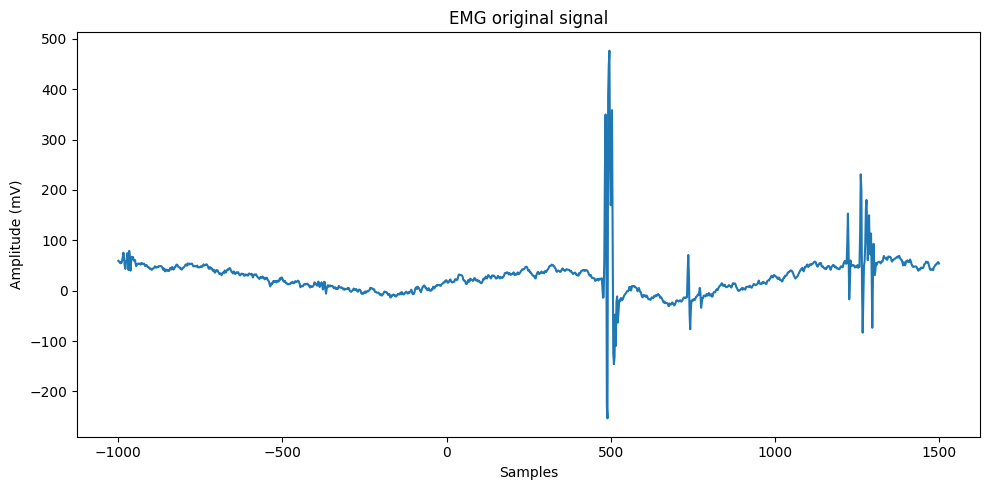

In [3]:
## LOADING THE SIGNAL FROM MAT FILE
# Loading the EMG data
emg_data = sio.loadmat('emg4TKEO.mat')

# Extracts the data taking the first element as 1D array
emg_time = emg_data['emgtime'][0]
emg_signal = emg_data['emg'][0]

# We begin now deep coyping and making the filtered signal just as the original signal
filtered_emg_signal = copy.deepcopy(emg_signal)

# Plotting the EMG signal
plt.figure(figsize=(10, 5))
plt.plot(emg_time, emg_signal, label='Original signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude (mV)')
plt.title('EMG original signal')
plt.tight_layout()
plt.show()

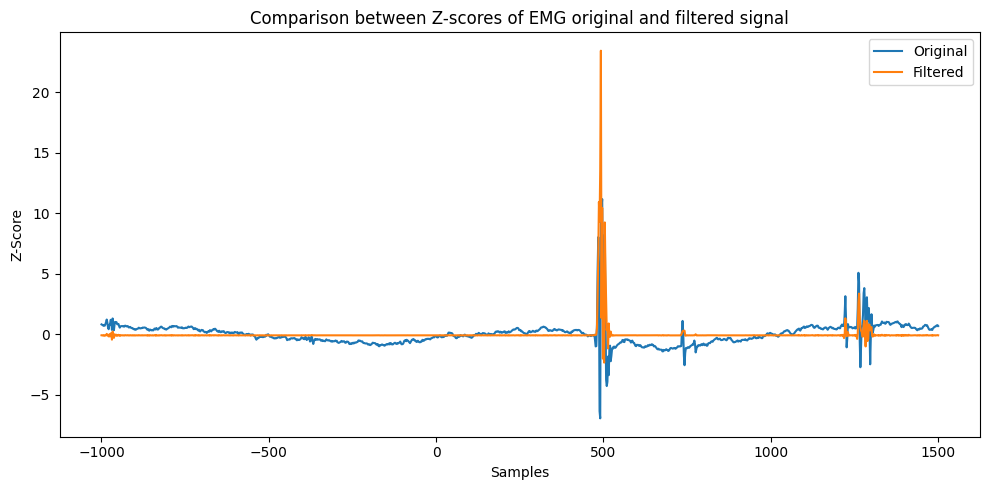

In [4]:
## GENERATING THE FILTER
# Please note that this filtered signal is ENERGY and it's the vectorised version of the previous filter
filtered_emg_signal[1:-1] = emg_signal[1:-1]**2 - emg_signal[0:-2] * emg_signal[2:]

# Converting to Z-score to compare with the original signal
z_score_emg_signal = (emg_signal - np.mean(emg_signal)) / np.std(emg_signal)
z_score_filtered_emg_signal = (filtered_emg_signal - np.mean(filtered_emg_signal)) / np.std(filtered_emg_signal)

# Plotting the EMG signal
plt.figure(figsize=(10, 5))
plt.plot(emg_time, z_score_emg_signal, label='Original signal')
plt.plot(emg_time, z_score_filtered_emg_signal, label='Filtered signal')
plt.xlabel('Samples')
plt.ylabel('Z-Score')
plt.title('Comparison between Z-scores of EMG original and filtered signal')
plt.legend(['Original', 'Filtered'])
plt.tight_layout()
plt.show()